## Assignment 0

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

### FEED FORWARD NEURAL NETWORK (FFNN)

Network Building of the Feed Forward Neural Network to recognise the Handwritten digits.
*Dataset*: MNIST datasets of **Handwritten digits**
* Input Layer Size=784
* No. Hidden Layer=1
* Hidden Layer Size= 100
* Output Layer Size=10


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1=nn.Linear(784, 100)
        self.fc2=nn.Linear(100, 10)

        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        x=self.fc1(x)
        x=self.sigmoid(x)
        x=self.fc2(x)

        x=F.softmax(x, dim=1)
        return x


In [3]:
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


**Number of parameters at each step and total parameters in the model**

In [4]:
params = list(net.named_parameters())
total_params=0
for name, param in params:
    print(name, ":", param.shape)
    total_params+=np.sum(np.prod(param.shape))
print("\nTotal Parameters:", total_params)

fc1.weight : torch.Size([100, 784])
fc1.bias : torch.Size([100])
fc2.weight : torch.Size([10, 100])
fc2.bias : torch.Size([10])

Total Parameters: 79510


**Forward Propagation**

In [5]:
apply_transforms= transforms.Compose([transforms.ToTensor()])
Batchsize=10

trainset= datasets.MNIST(root='./data', train=True, download=False, transform=apply_transforms)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=Batchsize, shuffle=True)


In [6]:
data1=next(iter(trainloader))
input1, label1=data1

label1

tensor([5, 4, 1, 6, 0, 0, 0, 4, 9, 1])

In [7]:
input1.size()

torch.Size([10, 1, 28, 28])

In [8]:
input1.view(input1.shape[0], -1).shape

torch.Size([10, 784])

In [9]:
output1=net(input1.view(input1.shape[0], -1))
output1

tensor([[0.0536, 0.1574, 0.1136, 0.0587, 0.0759, 0.1230, 0.0821, 0.1207, 0.0987,
         0.1163],
        [0.0530, 0.1537, 0.1160, 0.0564, 0.0757, 0.1221, 0.0859, 0.1200, 0.0995,
         0.1175],
        [0.0528, 0.1490, 0.1115, 0.0568, 0.0758, 0.1231, 0.0851, 0.1249, 0.0970,
         0.1239],
        [0.0511, 0.1507, 0.1130, 0.0576, 0.0741, 0.1182, 0.0852, 0.1232, 0.0998,
         0.1271],
        [0.0537, 0.1492, 0.1092, 0.0571, 0.0759, 0.1263, 0.0861, 0.1230, 0.1036,
         0.1159],
        [0.0529, 0.1536, 0.1132, 0.0568, 0.0750, 0.1208, 0.0838, 0.1257, 0.0976,
         0.1206],
        [0.0554, 0.1519, 0.1125, 0.0586, 0.0753, 0.1260, 0.0868, 0.1155, 0.0988,
         0.1191],
        [0.0514, 0.1509, 0.1154, 0.0580, 0.0751, 0.1188, 0.0864, 0.1232, 0.0983,
         0.1225],
        [0.0512, 0.1542, 0.1186, 0.0560, 0.0739, 0.1206, 0.0839, 0.1179, 0.0994,
         0.1243],
        [0.0539, 0.1489, 0.1120, 0.0566, 0.0762, 0.1229, 0.0856, 0.1240, 0.0972,
         0.1227]], grad_fn=<

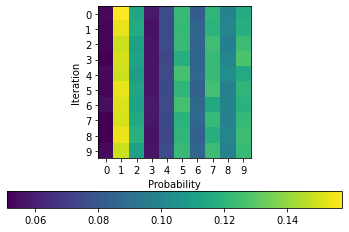

In [10]:
def show_tensor(x):
    plt.figure()
    plt.xticks(np.arange(0,10,1))
    plt.yticks(np.arange(0,10,1))
    plt.xlabel("Probability")
    plt.ylabel("Iteration")
    
    plt.imshow(x)
    plt.colorbar(orientation='horizontal')
    plt.show
    
show_tensor(output1.detach().numpy())

Additional: To see the actual image of the input

In [11]:
#tensor_image=(input1.view(input1.shape[2], input1.shape[3]))
#transforms.ToPILImage()(tensor_image).show()

### CONVOLUTIONAL NEURAL NETWORK (CNN)
Network building of Convolutional Neural Network (CNN) for Handwritten digit Recognition.
*Dataset*: MNIST datasets of **Handwritten digits** having Input Layer Size= (28x28)

#### LeNet Model
* No. Convolutional Layer=2
* Convolutional Layer 1 features:
    - Input = 32x32
    - Channels = 6
    - Kernel Size= 5x5
    - MaxPooling = 2x2 , stride=2

* Convolutional Layer 2 features:
    - Channels = 16
    - Kernel Size= 5x5
    - MaxPooling = 2x2 , stride=2
    
* Fully connected Layers
    - Layer1: Output = 120
    - Layer2: Output = 84
    - Layer2: Output = 10



In [12]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1=nn.Conv2d(1, 6, 5)
        self.pool1=nn.MaxPool2d(2, stride=2)
        self.conv2=nn.Conv2d(6, 16, 5)
        self.pool2=nn.MaxPool2d(2, stride=2)
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3=nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
            
        

In [13]:
lenet=LeNet()
print(lenet)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**Number of parameters at each step and total parameters in the model**

In [14]:
params = list(lenet.named_parameters())
total_params=0
for name, param in params:
    print(name, ":", param.shape)
    total_params+=np.sum(np.prod(param.shape))
print("\nTotal Parameters:", total_params)

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])

Total Parameters: 61706


**Forward Propagation**

In [15]:
transform_cnn=transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize=10
trainset_cnn= datasets.MNIST(root='./data', train=True, download=False, transform=transform_cnn)
trainloader_cnn= torch.utils.data.DataLoader(trainset_cnn, batch_size=BatchSize, shuffle=True)

In [16]:
data2=next(iter(trainloader_cnn))
input2, label2=data2

label2

tensor([4, 7, 8, 8, 1, 1, 0, 6, 3, 8])

In [17]:
input2.size()

torch.Size([10, 1, 32, 32])

In [18]:
output2=lenet(input2)
output2

tensor([[0.0916, 0.1036, 0.0987, 0.1121, 0.1066, 0.0873, 0.1083, 0.0918, 0.0962,
         0.1039],
        [0.0911, 0.1048, 0.0991, 0.1130, 0.1067, 0.0873, 0.1066, 0.0921, 0.0955,
         0.1038],
        [0.0924, 0.1035, 0.0981, 0.1115, 0.1080, 0.0874, 0.1085, 0.0914, 0.0961,
         0.1030],
        [0.0922, 0.1037, 0.0977, 0.1127, 0.1073, 0.0878, 0.1085, 0.0911, 0.0961,
         0.1029],
        [0.0911, 0.1042, 0.0986, 0.1127, 0.1073, 0.0867, 0.1076, 0.0917, 0.0967,
         0.1034],
        [0.0914, 0.1044, 0.0984, 0.1121, 0.1073, 0.0863, 0.1077, 0.0918, 0.0967,
         0.1039],
        [0.0919, 0.1041, 0.0977, 0.1138, 0.1076, 0.0875, 0.1077, 0.0914, 0.0953,
         0.1029],
        [0.0918, 0.1042, 0.0986, 0.1121, 0.1076, 0.0871, 0.1075, 0.0912, 0.0966,
         0.1034],
        [0.0915, 0.1036, 0.0977, 0.1129, 0.1072, 0.0877, 0.1085, 0.0919, 0.0953,
         0.1037],
        [0.0919, 0.1033, 0.0980, 0.1119, 0.1081, 0.0878, 0.1086, 0.0922, 0.0957,
         0.1024]], grad_fn=<

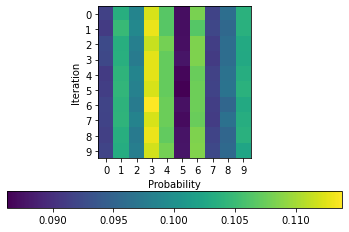

In [19]:
def show_tensor(x):
    plt.figure()
    plt.xticks(np.arange(0,10,1))
    plt.yticks(np.arange(0,10,1))
    plt.xlabel("Probability")
    plt.ylabel("Iteration")
    plt.imshow(x)
    plt.colorbar(orientation='horizontal')
    plt.show
show_tensor(output2.detach().numpy())

Additional: To see the actual image of the input

In [20]:
#tensor_image= input2.view(input2.shape[2], input2.shape[3])
#transforms.ToPILImage()(tensor_image).show()
